# 1. 여러 단축키->docstring에 접근

## help(), ?, ??, shift+tab

In [1]:
help(max)

Help on built-in function max in module builtins:

max(...)
    max(iterable, *[, default=obj, key=func]) -> value
    max(arg1, arg2, *args, *[, key=func]) -> value

    With a single iterable argument, return its biggest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the largest argument.



In [2]:
max?

Docstring:
max(iterable, *[, default=obj, key=func]) -> value
max(arg1, arg2, *args, *[, key=func]) -> value

With a single iterable argument, return its biggest item. The
default keyword-only argument specifies an object to return if
the provided iterable is empty.
With two or more arguments, return the largest argument.
Type:      builtin_function_or_method

In [13]:
max?? #소스코드까지 나오고 빌트인 함수는 나오지 않음

Docstring:
max(iterable, *[, default=obj, key=func]) -> value
max(arg1, arg2, *args, *[, key=func]) -> value

With a single iterable argument, return its biggest item. The
default keyword-only argument specifies an object to return if
the provided iterable is empty.
With two or more arguments, return the largest argument.
Type:      builtin_function_or_method

In [15]:
import numpy as np

In [16]:
a = np.array([1, 2, 3, 4, 5, 6])

In [18]:
a? #변수도 볼 수 있음

Type:        ndarray
String form: [1 2 3 4 5 6]
Length:      6
File:        c:\anaconda3\lib\site-packages\numpy\__init__.py
Docstring:  
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` module and examine the
methods and attributes of an array.

Parameters
----------
(for the __new__ method; see Notes below)

shape : tuple of ints
    Shape of created array.
dtype : data-type, optional
    Any object that can be 

In [19]:
def double(a):
  '''Return a * 2'''   #'함수에서 '''안에 있는에가 docstring이 됨'''
  return a * 2

In [20]:
double?

Signature: double(a)
Docstring: Return a * 2
File:      c:\users\깽욱\appdata\local\temp\ipykernel_16492\3298785123.py
Type:      function

# 2. 회귀의 오차 측정 공식
오차는 작을수록 좋다

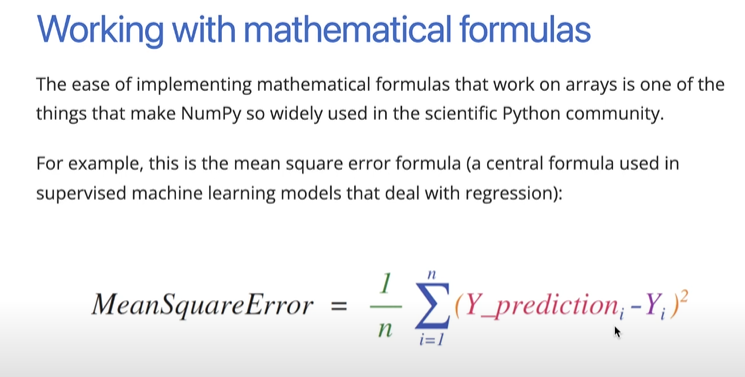

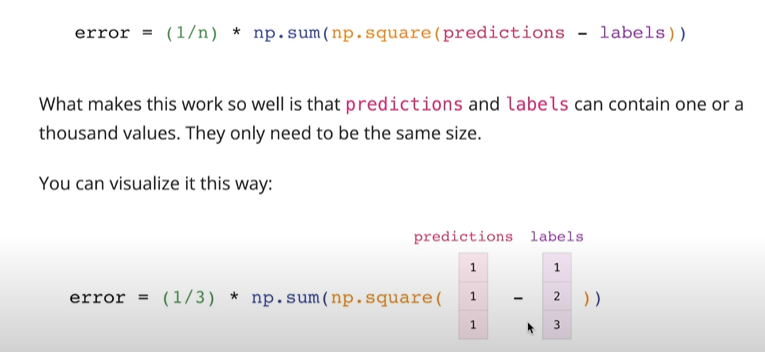

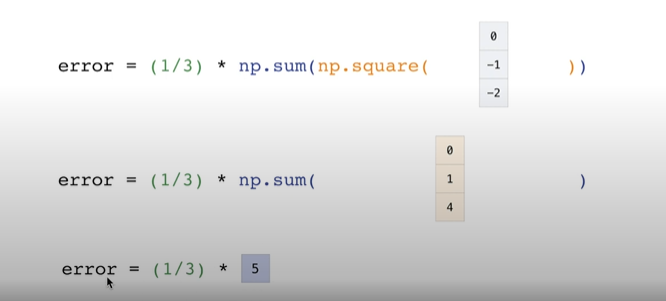

In [22]:
#실제값-예측값의 차이의 제곱의 평균
#mse
predictions=np.ones(3,dtype=int)
labels=np.arange(1,4)
predictions, labels

(array([1, 1, 1]), array([1, 2, 3]))

In [23]:
np.square(predictions-labels) #제곱하기

array([0, 1, 4])

In [24]:
np.sum(np.square(predictions-labels)) #전체요소 더하기

5

In [25]:
mse=np.sum(np.square(predictions-labels))*(1/3) # n=3
mse

1.6666666666666665

## RMSE(root mean squared error)

In [26]:
rmse=np.sqrt(mse)
rmse

1.2909944487358056

## MAE(mean absolute error)
예측값과 실제값의 차이에 대한 절댓값의 평균

In [27]:
error=predictions-labels
mae=np.mean(np.abs(error)) #절대값의 평균
mae

1.0

## MAPE(mean absolute percentage error)
(실제값-예측값)/실제값 의 절댓값에 대한 평균

In [28]:
np.mean(np.abs((predictions-labels)/labels))

0.38888888888888884

# 3.파일 저장
np.save, np.savez, np.savetxt, np.load, np.loadtxt

## 배열 저장하고 불러오기

In [29]:
a = np.array([1, 2, 3, 4, 5, 6])
a

array([1, 2, 3, 4, 5, 6])

In [30]:
np.save('filename',a) #확장자 없이 이름->.npy로 생성, 넣을 데이터

In [31]:
np.load('filename.npy') #확장자 .npy로 가져와야 불러올 수 있음

array([1, 2, 3, 4, 5, 6])

## 배열 텍스트 파일로

In [32]:
csv_arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])
csv_arr

array([1, 2, 3, 4, 5, 6, 7, 8])

In [33]:
np.savetxt('new_file.csv', csv_arr) #이름.csv확장자, 데이터

In [34]:
np.loadtxt('new_file.csv')

array([1., 2., 3., 4., 5., 6., 7., 8.])

## 하지만 주로 pandas를 사용할 것

In [37]:
import pandas as pd

In [35]:
a = np.array([[-2.58289208,  0.43014843, -1.24082018, 1.59572603],
              [ 0.99027828, 1.17150989,  0.94125714, -0.14692469],
              [ 0.76989341,  0.81299683, -0.95068423, 0.11769564],
              [ 0.20484034,  0.34784527,  1.96979195, 0.51992837]])
a

array([[-2.58289208,  0.43014843, -1.24082018,  1.59572603],
       [ 0.99027828,  1.17150989,  0.94125714, -0.14692469],
       [ 0.76989341,  0.81299683, -0.95068423,  0.11769564],
       [ 0.20484034,  0.34784527,  1.96979195,  0.51992837]])

In [38]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-2.582892,0.430148,-1.240820,1.595726
1,0.990278,1.171510,0.941257,-0.146925
2,0.769893,0.812997,-0.950684,0.117696
3,0.204840,0.347845,1.969792,0.519928


In [39]:
df.to_csv('pd.csv') #배열 df화 후 csv로 저장

In [40]:
data = pd.read_csv('pd.csv') #불러오기
data

,Unnamed: 0,0,1,2,3
0,0,-2.582892,0.430148,-1.240820,1.595726
1,1,0.990278,1.171510,0.941257,-0.146925
2,2,0.769893,0.812997,-0.950684,0.117696
3,3,0.204840,0.347845,1.969792,0.519928


In [41]:
np.savetxt('np.csv', a, fmt='%.2f', delimiter=',', header='1,  2,  3,  4') #소수점 2자리까지, ','로 구분

In [43]:
cat np.csv #불러오기

SyntaxError: invalid syntax (3175422441.py, line 1)